In [1]:
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_stemming.pkl')
dfNo = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_nostemming.pkl')

In [150]:
kf = KFold(n_splits=5)
i = 1
for train_index, test_index in kf.split(df):
#     print(test_index)
#     print(train_index[0],"-",train_index[len(train_index)-1])
    print(test_index[0],"+",test_index[len(test_index)-1])
    X_train = df['text'].iloc[train_index[0]:train_index[len(train_index)-1]]
    X_test = df['text'].iloc[test_index[0]:test_index[len(test_index)-1]]
    y_train = df['label'].iloc[train_index[0]:train_index[len(train_index)-1]].astype('int')
    y_test = df['label'].iloc[test_index[0]:test_index[len(test_index)-1]].astype('int')
    
#     vectorizer = TfidfVectorizer()
#     X_train = vectorizer.fit_transform(X_train)
#     X_test = vectorizer.transform(X_test)
    counter = CountVectorizer(min_df=3,
                              dtype=np.double)
    counter.fit(X_train)
    X_train = counter.transform(X_train)
    X_test = counter.transform(X_test)
    
    transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    tem1 = vectorizer.get_feature_names()
    fk = int(len(tem1))
    k = round((i/10)*fk)
    
    X_train,X_test = select_features(X_train, y_train, X_test,k)
    
    modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
    modelknn2.fit(X_train,y_train)
    y_pred = modelknn2.predict(X_test)
#     print(classification_report(y_test,y_pred))
    result = modelknn2.score(X_test, y_test)
    print("Fold ke-",i,"=",result)
    print("----------------")
    i+=1

0 + 215
Fold ke- 1 = 0.3627906976744186
----------------
216 + 431
Fold ke- 2 = 0.5906976744186047
----------------
432 + 647
Fold ke- 3 = 0.8046511627906977
----------------
648 + 863
Fold ke- 4 = 0.8232558139534883
----------------
864 + 1079
Fold ke- 5 = 0.7627906976744186
----------------


In [3]:
def split(strt,fnsh,df):
    X_test = df['text'].iloc[strt:fnsh]
    y_test = df['label'].iloc[strt:fnsh].astype('int')
    df.drop(df.index[strt:fnsh])
    X_train = df['text']
    y_train = df['label'].astype('int')    
    return X_train, X_test, y_train, y_test

In [134]:
def select_features(train_X, train_y, test_X,k):
#     total fitur 7343
# 2004
# 1802 nltk
# 2599 sastrawi 1967
    selector = SelectKBest(chi2, k=k)
    selector.fit(train_X, train_y)
#     new = selector.fit_transform(train_X, train_y)
#     print(new.shape)
    train_X = selector.transform(train_X)
    test_X = selector.transform(test_X)
    return train_X, test_X

In [159]:
def classifier(df,distance_name,k_neighbor):
    print("Nama distance=",distance_name)
    print("Jumlah K tetangga=",k_neighbor)
#     360
#     spl = [0,36,72,108,144,180,216,252,288,324,360]
#     960
#     spl = [0,96,192,288,384,480,576,672,768,864,960]
#     1080
    spl = [0,108,216,324,432,540,648,756,864,972,1080]
    tempspl = []
    i = 0
    akurasimax=0
    while (i<len(spl)-1):
        if len(spl)-2 != len(tempspl):
            X_train, X_test, y_train, y_test = split(spl[i],spl[i+2],df)
            tempspl.append(spl[i])
    #   ketika array[i+2] == null (looping terakhir)
        elif (len(spl)-len(tempspl)) == 2:
    #       split last and first
            X_test1 = df['text'].iloc[spl[i]:spl[i+1]]
            y_test1 = df['label'].iloc[spl[i]:spl[i+1]].astype('int')
            X_test2 = df['text'].iloc[tempspl[0]:tempspl[1]]
            y_test2 = df['label'].iloc[tempspl[0]:tempspl[1]].astype('int')
    #       concat last and first
            X_test = pd.concat([X_test1, X_test2], axis=0)
            y_test = pd.concat([y_test1, y_test2], axis=0)
    #       split except last and first
            X_train = df['text'].iloc[tempspl[1]:tempspl[len(tempspl)-1]]
            y_train = df['label'].iloc[tempspl[1]:tempspl[len(tempspl)-1]].astype('int')
        
        vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
#         vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

#         counter = CountVectorizer(min_df=3,
#                               dtype=np.double)
#         counter.fit(X_train)
#         X_train = counter.transform(X_train)
#         X_test = counter.transform(X_test)

#         transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
#         X_train = transformer.fit_transform(X_train)
#         X_test = transformer.transform(X_test)
#         X_train,X_test = select_features(X_train, y_train, X_test,k)

        modelknn = KNeighborsClassifier(n_neighbors=k_neighbor, weights='uniform', metric=distance_name)
        modelknn.fit(X_train,y_train)
        y_pred = modelknn.predict(X_test)
#         print(classification_report(y_test,y_pred))
        result = modelknn.score(X_test, y_test)
        print("Fold ke-",i+1,"=",result)
        if (result >= akurasimax):
            akurasimax = result
            foldke = i+1
        i+=1
    print("Akurasi terbaik adalah",akurasimax,"pada fold ke-",foldke)
    print("------------------------------------")
    return akurasimax

Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.14351851851851852
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 0.8379629629629629
Fold ke- 2 = 0.8472222222222222
Fold ke- 3 = 0.8703703703703703
Fold ke- 4 = 0.875
Fold ke- 5 = 0.9212962962962963
Fold ke- 6 = 0.9398148148148148
Fold ke- 7 = 0.9259259259259259
Fold ke- 8 = 0.8981481481481481
Fold ke- 9 = 0.9027777777777778
Fold ke- 10 = 0.6712962962962963
Akurasi terbaik adalah 0.9398148148148148 pada fold ke- 6
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 5
Fold ke- 1 = 0.8055555555555556
Fold ke- 2 = 0.7870370370370371
Fold ke- 3 = 0.7870370370370371
Fold ke- 4 = 0.8148148148148148
Fold ke- 5 = 0.9

Fold ke- 4 = 0.8148148148148148
Fold ke- 5 = 0.9027777777777778
Fold ke- 6 = 0.9166666666666666
Fold ke- 7 = 0.8796296296296297
Fold ke- 8 = 0.8564814814814815
Fold ke- 9 = 0.8842592592592593
Fold ke- 10 = 0.7314814814814815
Akurasi terbaik adalah 0.9166666666666666 pada fold ke- 6
------------------------------------
Dengan Stemming
Nama distance= minkowski
Jumlah K tetangga= 7
Fold ke- 1 = 0.8055555555555556
Fold ke- 2 = 0.7962962962962963
Fold ke- 3 = 0.8055555555555556
Fold ke- 4 = 0.8287037037037037
Fold ke- 5 = 0.8888888888888888
Fold ke- 6 = 0.9074074074074074
Fold ke- 7 = 0.8703703703703703
Fold ke- 8 = 0.8518518518518519
Fold ke- 9 = 0.8657407407407407
Fold ke- 10 = 0.7314814814814815
Akurasi terbaik adalah 0.9074074074074074 pada fold ke- 6
------------------------------------
Dengan Stemming
Nama distance= minkowski
Jumlah K tetangga= 9
Fold ke- 1 = 0.7916666666666666
Fold ke- 2 = 0.7824074074074074
Fold ke- 3 = 0.7962962962962963
Fold ke- 4 = 0.8287037037037037
Fold ke- 5 =

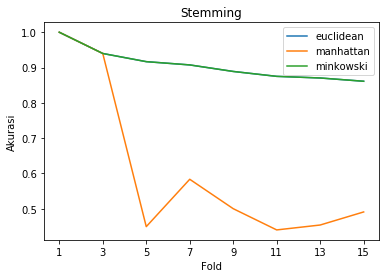

Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.12962962962962962
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 0.8287037037037037
Fold ke- 2 = 0.8333333333333334
Fold ke- 3 = 0.8518518518518519
Fold ke- 4 = 0.8657407407407407
Fold ke- 5 = 0.9074074074074074
Fold ke- 6 = 0.9351851851851852
Fold ke- 7 = 0.9259259259259259
Fold ke- 8 = 0.8888888888888888
Fold ke- 9 = 0.8796296296296297
Fold ke- 10 = 0.6620370370370371
Akurasi terbaik adalah 0.9351851851851852 pada fold ke- 6
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 5
Fold ke- 1 = 0.8055555555555556
Fold ke- 2 = 0.7731481481481481
Fold ke- 3 = 0.7916666666666666
Fold ke- 4 = 0.8518518518518519
Fold k

Fold ke- 2 = 0.7731481481481481
Fold ke- 3 = 0.7916666666666666
Fold ke- 4 = 0.8518518518518519
Fold ke- 5 = 0.9305555555555556
Fold ke- 6 = 0.9166666666666666
Fold ke- 7 = 0.875
Fold ke- 8 = 0.8703703703703703
Fold ke- 9 = 0.8842592592592593
Fold ke- 10 = 0.7314814814814815
Akurasi terbaik adalah 0.9305555555555556 pada fold ke- 5
------------------------------------
Tanpa Stemming
Nama distance= minkowski
Jumlah K tetangga= 7
Fold ke- 1 = 0.8101851851851852
Fold ke- 2 = 0.7916666666666666
Fold ke- 3 = 0.8101851851851852
Fold ke- 4 = 0.8425925925925926
Fold ke- 5 = 0.8935185185185185
Fold ke- 6 = 0.8981481481481481
Fold ke- 7 = 0.8796296296296297
Fold ke- 8 = 0.8703703703703703
Fold ke- 9 = 0.875
Fold ke- 10 = 0.7546296296296297
Akurasi terbaik adalah 0.8981481481481481 pada fold ke- 6
------------------------------------
Tanpa Stemming
Nama distance= minkowski
Jumlah K tetangga= 9
Fold ke- 1 = 0.8055555555555556
Fold ke- 2 = 0.7916666666666666
Fold ke- 3 = 0.8101851851851852
Fold ke-

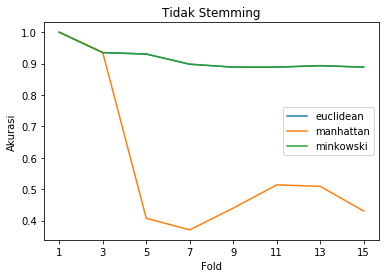

Lama Proses 320.3657205104828 seconds
Wall time: 5min 20s


In [160]:
%%time
# %%capture cap --no-stderr
start_time = time.time()
dfcount = [df,dfNo]
distancecount = ['euclidean','manhattan','minkowski']
kcount = [1,3,5,7,9,11,13,15]
for x in range(2):
    arrd1 = []
    arrd2 = []
    arrd3 = []
    for y in range(len(distancecount)):
        maxresult = []
        for z in range(len(kcount)):
            if x==0:
                print('Dengan Stemming')
            else:
                print('Tanpa Stemming')
            tempmax= classifier(dfcount[x],distancecount[y],kcount[z])
            maxresult.append(tempmax)
            if y==0:
                arrd1.append(tempmax)
            elif y==1:
                arrd2.append(tempmax)
            elif y==2:
                arrd3.append(tempmax)
#         tapi fold yang dipakai beda beda
    plt.plot(kcount, arrd1, label = "euclidean")
    plt.plot(kcount, arrd2, label = "manhattan")
    plt.plot(kcount, arrd3, label = "minkowski")
    plt.xticks(kcount)
    if x==0:
        plt.title("Stemming")
    else:
        plt.title("Tidak Stemming")
    plt.xlabel('Fold')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.pause(0.05)
plt.show
print("Lama Proses %s seconds" % (time.time() - start_time))
# with open('5000_fitur_SWnltkv2.txt', 'w') as f:
#     f.write(cap.stdout)

In [58]:
df.text.loc[0]

'menpora dukung pianis cilik asal kendal ingin pecah rekor dunia inggris menpora imam nahrawi hari kamis siang kemarin terima pianis cilik jefri setiawan laku pecah rekor dunia main piano mata tutup inggris menpora bangga dukung sepenuh ingin jefri bisa harum nama indonesia pentas dunia itu sampai menpora jumpa pers loby kantor kemenpora jakarta jefri audiensi belum menpora sampai harap menteri pemuda olahraga fasilitas temu presiden joko widodo dukung jelang berangkat inggris tanggap menpora janji segera surat presiden joko widodo penuh ingin jefri fasilitas transportasi akomodasi jefri acara sebut hari ada banyak anak anak muda prestasi segala kreativitas mampu dorong sepenuh terus prestasi dukung perintah semua pihak masuk swasta akan mampu buat prestasi dengar gaung masyarakat jelas imam menpora pesan jefri kata mampu milik jefri harus kembang terus potensi budaya ada indonesia indonesia milik banyak seni tari musik lukis terus cari inovasi baru musik madu seni budaya milik akan ma

# try--

In [19]:
X_train = df['text'].iloc[192:]
X_test = df['text'].iloc[:192]
y_train = df['label'].iloc[192:].astype('int')
y_test = df['label'].iloc[:192].astype('int')

In [61]:
X = df['text']
y = df['label'].astype('int')
# X = dfNo['text']
# y = dfNo['label'].astype('int')

In [153]:
def asd():
    X_train, X_test, y_train, y_test = split(540,756,df)
    return X_train, X_test, y_train, y_test

In [154]:
X_train, X_test, y_train, y_test = split(540,756,df)
vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
tem1 = vectorizer.get_feature_names()
fk = int(len(tem1))
i = 1
while (i<=10):
    k = round((i/10)*fk)
    X_train, X_test, y_train, y_test = asd()
    vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    X_train,X_test = select_features(X_train, y_train, X_test,k)
    modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
    modelknn2.fit(X_train,y_train)
    y_pred = modelknn2.predict(X_test)
    print("Klasifikasi dengan",k,"fitur /",i/10*100,"%")
    print(classification_report(y_test,y_pred))
    i+=1

Klasifikasi dengan 502 fitur / 10.0 %
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        18
           1       0.79      0.83      0.81        18
           2       1.00      0.89      0.94        18
           3       0.74      0.94      0.83        18
           4       0.81      0.72      0.76        18
           5       0.83      0.83      0.83        18
           6       1.00      0.89      0.94        18
           7       0.92      0.61      0.73        18
           8       1.00      0.39      0.56        18
           9       1.00      1.00      1.00        18
          10       0.94      0.89      0.91        18
          11       0.92      0.67      0.77        18

    accuracy                           0.81       216
   macro avg       0.87      0.81      0.81       216
weighted avg       0.87      0.81      0.81       216

Klasifikasi dengan 1004 fitur / 20.0 %
              precision    recall  f1-score   support

 

In [120]:
X_train, X_test, y_train, y_test = split(540,756,df)

In [ ]:
# Pembentukan tf-idf untuk pembobotan
vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(X)
# print(X)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train,X_test = select_features(X_train, y_train, X_test)

In [109]:
X_train.todense()
# X1.todense()
print(vectorizer.get_feature_names())
tem1 = vectorizer.get_feature_names()
print(tem1)

['aaaa', 'aacsb', 'aad', 'aagn', 'aam', 'aan', 'aang', 'ab', 'aba', 'abad', 'abadi', 'abah', 'abai', 'abalone', 'abang', 'abaya', 'abbas', 'abd', 'abdi', 'abdillah', 'abdul', 'abdulamir', 'abdulazis', 'abdulaziz', 'abdullah', 'abdurahman', 'abdurrahman', 'abe', 'aberdeen', 'abest', 'abg', 'abi', 'abidin', 'abilene', 'abimana', 'abnormal', 'aboday', 'abon', 'aboul', 'abpm', 'abqaiq', 'abraham', 'abrar', 'abs', 'absah', 'absen', 'abshar', 'absm', 'absolut', 'abu', 'abubakar', 'abun', 'aburizal', 'ac', 'academy', 'acak', 'acap', 'acapkali', 'acar', 'acara', 'acaramenurutnya', 'acau', 'accor', 'accord', 'accountable', 'ace', 'aceh', 'acep', 'acer', 'achmad', 'achsanul', 'acl', 'acquisition', 'acset', 'acst', 'act', 'action', 'activision', 'actuation', 'acu', 'acung', 'ad', 'ada', 'adab', 'adah', 'adakan', 'adalah', 'adam', 'adamas', 'adamatine', 'adang', 'adapaun', 'adaptasi', 'adaptif', 'adaptor', 'adapula', 'adapun', 'adaro', 'adat', 'ade', 'adegan', 'adek', 'adelaide', 'adh', 'adhadirgh

In [110]:
print(len(tem1))

16512


In [111]:
corpus = df['text']

In [115]:
# print(vectorizer.vocabulary_)
# print(len(vectorizer.get_feature_names()))
df_coba = pd.DataFrame(X_train.todense().T,
                      index=vectorizer.get_feature_names())
#                       column=[f'D{i+1}' for i in range(len(corpus))])
df_coba

ValueError: Shape of passed values is (1, 5000), indices imply (16512, 5000)

In [78]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [94]:
%%time
modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
modelknn2.fit(X_train,y_train)

Wall time: 1.83 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [95]:
y_pred = modelknn2.predict(X_test)
y_pred

array([ 0,  1,  2,  3,  4,  5,  6,  1,  8,  9,  1, 11,  0,  1,  2,  3,  1,
        5,  6,  7,  8,  9, 10,  1,  0,  1,  2,  3,  4,  5,  6,  7,  7,  9,
        1,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  5,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9,  1, 11,  5, 11,  2,  3,  4,  5,  6,  1,
        8,  9,  1,  1,  0,  1,  5,  3,  4,  5,  1,  7,  8,  9, 10, 11,  0,
        3,  1,  1,  5,  5,  1,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  1,  0,  1,  2,  3,  4,  5,  6,  1,  1,  9, 10,
        4,  0,  3,  1,  3,  4,  1,  6,  7,  3,  9, 10, 11,  1,  1,  2,  3,
        1,  5,  6,  7,  8,  9,  1,  1,  0,  1,  2,  3,  5,  5,  6,  1,  3,
        9, 10, 11,  1,  1,  7,  3,  4,  5,  6,  7,  3,  9, 10, 11,  0,  1,
        2,  3,  0,  5,  6,  0,  3,  9, 10, 11,  1,  1,  2,  3,  4,  5,  6,
        7,  8,  9,  5, 11,  1,  1,  1,  3,  4,  5,  6,  1,  1,  9, 10, 11,
        1,  1,  5,  3,  5,  5,  1,  1,  3,  9, 10,  1])

In [96]:
modelknn2.predict_proba(X_test)

array([[0.38461538, 0.07692308, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.69230769, 0.        , ..., 0.07692308, 0.07692308,
        0.        ],
       [0.        , 0.07692308, 0.46153846, ..., 0.07692308, 0.        ,
        0.07692308],
       ...,
       [0.        , 0.        , 0.        , ..., 0.92307692, 0.        ,
        0.        ],
       [0.        , 0.07692308, 0.        , ..., 0.07692308, 0.46153846,
        0.07692308],
       [0.        , 0.23076923, 0.        , ..., 0.07692308, 0.07692308,
        0.23076923]])

In [97]:
print(confusion_matrix(y_test, y_pred))

[[12  5  0  0  0  1  0  0  0  0  0  0]
 [ 0 15  0  2  0  0  0  0  0  0  0  1]
 [ 0  3 12  0  0  2  0  1  0  0  0  0]
 [ 0  1  0 17  0  0  0  0  0  0  0  0]
 [ 1  2  0  0 12  3  0  0  0  0  0  0]
 [ 0  1  0  0  0 17  0  0  0  0  0  0]
 [ 0  3  0  0  0  0 15  0  0  0  0  0]
 [ 1  6  0  0  0  0  0 11  0  0  0  0]
 [ 0  2  0  5  0  0  0  1 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  5  0  0  0  1  0  0  0  0 12  0]
 [ 0  6  0  0  1  1  0  0  0  0  0 10]]


In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.31      0.83      0.45        18
           2       1.00      0.67      0.80        18
           3       0.71      0.94      0.81        18
           4       0.92      0.67      0.77        18
           5       0.68      0.94      0.79        18
           6       1.00      0.83      0.91        18
           7       0.85      0.61      0.71        18
           8       1.00      0.56      0.71        18
           9       1.00      1.00      1.00        18
          10       1.00      0.67      0.80        18
          11       0.91      0.56      0.69        18

    accuracy                           0.75       216
   macro avg       0.85      0.75      0.77       216
weighted avg       0.85      0.75      0.77       216



In [99]:
result = modelknn2.score(X_test, y_test)
print(result)

0.7453703703703703


In [34]:
result_class = pd.DataFrame({'Actual Result':y_test, 'Predicted Result':y_pred})
result_class

,Actual Result,Predicted Result
540,0,0
541,1,1
542,2,2
543,3,3
544,4,4
...,...,...
751,7,7
752,8,3
753,9,9
754,10,10


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(result_class)